In [2]:
import random
from random import choice
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from scipy import stats
from sklearn import linear_model
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [34]:
tabla = pd.read_csv('Datos/TR_PERSONA17.CSV',encoding='latin1')
tabla.head()

,ID_VIV,ID_PERSONA,ENT,NOM_ENT,MUN,NOM_MUN,LOC50K,NOM_LOC,COBERTURA,ESTRATO,...,HIJOS_NAC_VIVOS,HIJOS_FALLECIDOS,HIJOS_SOBREVIV,FECHA_NAC_M,FECHA_NAC_A,SOBREVIVENCIA,EDAD_MORIR_D,EDAD_MORIR_M,EDAD_MORIR_A,TAMLOC
0,170010000001,17001000000101,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,170010000002,17001000000201,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-06,...,7.0,0.0,7.0,8.0,1978.0,1.0,NaN,NaN,NaN,1
2,170010000003,17001000000303,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,170010000003,17001000000301,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,170010000003,17001000000302,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-08,...,1.0,0.0,1.0,10.0,2012.0,1.0,NaN,NaN,NaN,2


In [35]:
tabla.columns

Index(['ID_VIV', 'ID_PERSONA', 'ENT', 'NOM_ENT', 'MUN', 'NOM_MUN', 'LOC50K',
       'NOM_LOC', 'COBERTURA', 'ESTRATO', 'UPM', 'FACTOR', 'NUMPER', 'SEXO',
       'EDAD', 'PARENT', 'PARENT_OTRO_C', 'IDENT_MADRE', 'IDENT_PADRE',
       'SERSALUD', 'AFRODES', 'ACTA_NAC', 'DHSERSAL1', 'DHSERSAL2',
       'PERTE_INDIGENA', 'ENT_PAIS_NAC', 'NACIONALIDAD', 'HLENGUA',
       'QDIALECT_C', 'QDIALECT_INALI', 'HESPANOL', 'ELENGUA', 'ASISTEN',
       'MUN_ASI', 'NOM_MUN_ASI', 'ENT_PAIS_ASI', 'TIE_TRASLADO_ESCU',
       'MED_TRASLADO_ESC1', 'MED_TRASLADO_ESC2', 'MED_TRASLADO_ESC3',
       'ESCOLARI', 'NIVACAD', 'ALFABET', 'ESCOACUM', 'MUN_RES10',
       'NOM_MUN_RES10', 'ENT_PAIS_RES10', 'SITUA_CONYUGAL', 'IDENT_PAREJA',
       'CONACT', 'OCUPACION_C', 'SITUACION_TRAB', 'AGUINALDO', 'VACACIONES',
       'SERVICIO_MEDICO', 'UTILIDADES', 'INCAP_SUELDO', 'SAR_AFORE',
       'CREDITO_VIVIENDA', 'INGTRMEN', 'ACTIVIDADES_C', 'MUN_TRAB',
       'NOM_MUN_TRAB', 'ENT_PAIS_TRAB', 'TIE_TRASLADO_TRAB',
       '

In [36]:
tabla_pr = tabla[['SEXO','EDAD','INGTRMEN','ESCOACUM']]
tabla_pr = tabla_pr.dropna()

In [37]:
tabla_pr.replace({'SEXO' : 3}, 0, inplace=True)
tabla_pr.head()

,SEXO,EDAD,INGTRMEN,ESCOACUM
0,1,30,10000.0,16.0
3,1,23,4286.0,9.0
4,0,24,4286.0,6.0
9,0,47,12857.0,9.0
11,1,41,857.0,9.0


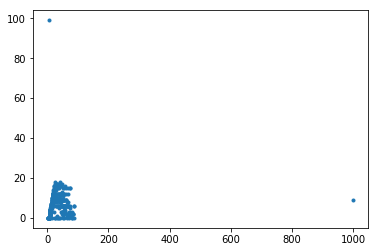

In [38]:
muestra = tabla.sample(400)
plt.plot(muestra['EDAD'], muestra['ESCOACUM'], marker='.', linestyle='none')

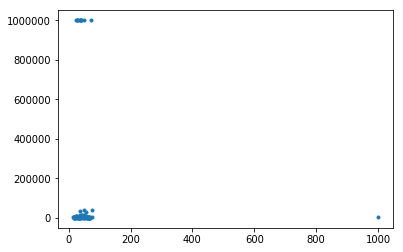

In [39]:
muestra = tabla.sample(400)
plt.plot(muestra['EDAD'], muestra['INGTRMEN'], marker='.', linestyle='none')

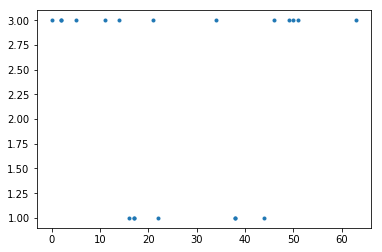

In [40]:
muestra = tabla.sample(20)
plt.plot(muestra['EDAD'], muestra['SEXO'], marker='.', linestyle='none')

In [41]:
tabla_pr1= tabla_pr[(tabla_pr['INGTRMEN']>0)&(tabla_pr['EDAD']<=100)
                    &(tabla_pr['INGTRMEN']<999_999)&(tabla_pr['ESCOACUM']>0)
                    &(tabla_pr['ESCOACUM']<99)]

In [42]:
tabla_pr1.describe()

,SEXO,EDAD,INGTRMEN,ESCOACUM
count,120503.000000,120503.000000,120503.000000,120503.000000
mean,0.639461,37.732480,4899.306109,9.734961
std,0.480159,13.498149,5746.262155,3.930578
min,0.000000,12.000000,8.000000,1.000000
25%,0.000000,27.000000,2571.000000,6.000000
50%,1.000000,36.000000,4000.000000,9.000000
75%,1.000000,47.000000,5800.000000,12.000000
max,1.000000,99.000000,999998.000000,24.000000


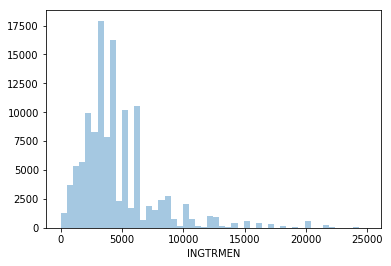

In [43]:
sns.distplot(tabla_pr1['INGTRMEN'][tabla_pr1['INGTRMEN']<25000],kde=False)

In [44]:
tabla_pr1['LOGINGTRMEN']=np.log10(tabla_pr1['INGTRMEN'])
tabla_pr1.LOGINGTRMEN.describe()

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


count    120503.000000
mean          3.579215
std           0.307518
min           0.903090
25%           3.410102
50%           3.602060
75%           3.763428
max           5.999999
Name: LOGINGTRMEN, dtype: float64

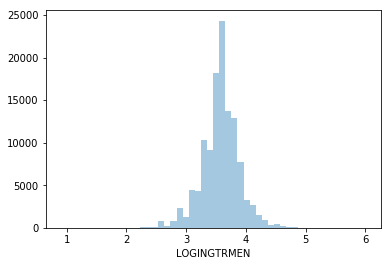

In [45]:
sns.distplot(tabla_pr1.LOGINGTRMEN,kde=False)

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


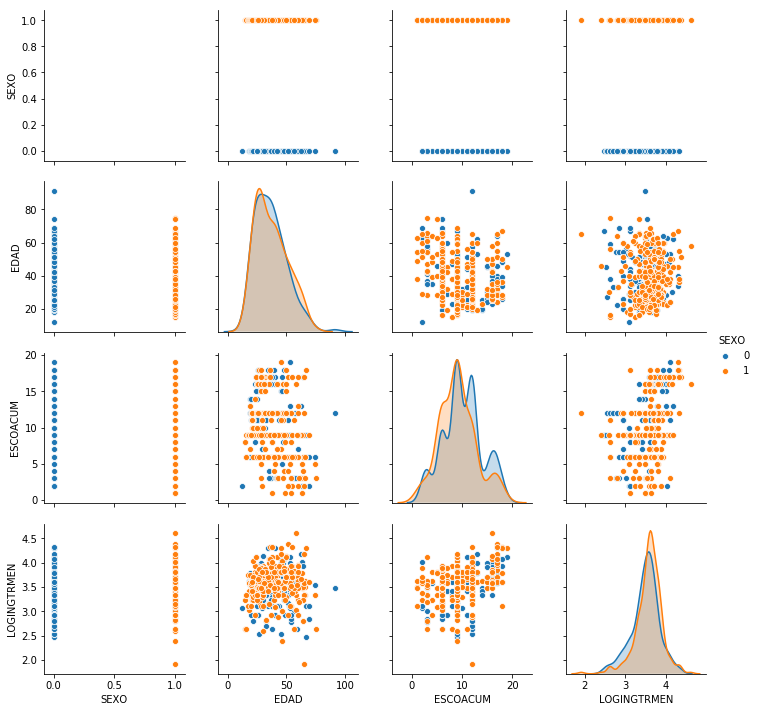

In [46]:
muestra=tabla_pr1.sample(500).drop(columns='INGTRMEN')
sns.pairplot(muestra,hue='SEXO')

In [47]:
muestra.corr()

,SEXO,EDAD,ESCOACUM,LOGINGTRMEN
SEXO,1.000000,0.021944,-0.129571,0.129338
EDAD,0.021944,1.000000,-0.243425,-0.027754
ESCOACUM,-0.129571,-0.243425,1.000000,0.322490
LOGINGTRMEN,0.129338,-0.027754,0.322490,1.000000


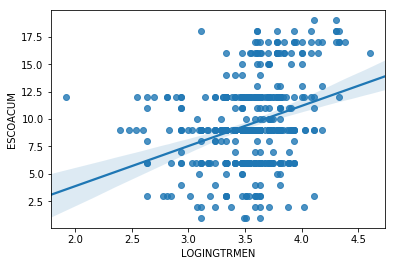

In [48]:
sns.regplot(muestra['LOGINGTRMEN'],muestra['ESCOACUM'])

# Linear Regresion

In [49]:
#muestra.drop(['SEXO'], axis=1)
#tabla_pr1.drop(['SEXO'], axis=1)
regresor = linear_model.LinearRegression(normalize=True)

In [50]:
regresor.fit(muestra.drop(columns=['LOGINGTRMEN']).values,muestra['LOGINGTRMEN'].values)
dict(zip(muestra.columns,regresor.coef_))

{'SEXO': 0.11880226132954429,
 'EDAD': 0.0013779298158710525,
 'ESCOACUM': 0.03161880073239374}

In [51]:
10**regresor.intercept_

1328.189126908156

In [52]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(muestra.drop(['LOGINGTRMEN'], axis=1),muestra['LOGINGTRMEN'],test_size=.2)

In [218]:
y_pred = regresor.predict(X_test)
l = metrics.mean_squared_error(y_test,y_pred)
l**0.5

0.3023352288512317

In [219]:
regresor=linear_model.LinearRegression()
regresor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [220]:
y_pred=regresor.predict(X_test)
l=metrics.mean_squared_error(y_test,y_pred)
l

0.09526865621926645

In [221]:
regresor=linear_model.LinearRegression(normalize=True)

In [222]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(tabla_pr1.drop(['INGTRMEN','LOGINGTRMEN'], axis=1),tabla_pr1['LOGINGTRMEN'],test_size=.2)

In [223]:
regresor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [224]:
regresor.intercept_

3.0761538308891856

In [225]:
y_pred = regresor.predict(X_test)
l = metrics.mean_squared_error(y_test,y_pred)
l

0.07601797080972707

# Regresion[lineal] Lasso

In [226]:
regresor = linear_model.Lasso(normalize=True,alpha=2)

In [227]:
regresor.fit(muestra.drop(columns=['LOGINGTRMEN']).values,muestra['LOGINGTRMEN'].values)
dict(zip(muestra.columns,regresor.coef_))

{'SEXO': 0.0, 'EDAD': -0.0, 'ESCOACUM': 0.0}

In [269]:
10**regresor.intercept_

1.2861063694322784e+42

In [229]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(tabla_pr1.drop(['INGTRMEN','LOGINGTRMEN'], axis=1),tabla_pr1['LOGINGTRMEN'],test_size=.2)

In [230]:
regresor.fit(X_train,y_train)
dict(zip(tabla_pr1.columns,regresor.coef_))

{'SEXO': 0.0, 'EDAD': 0.0, 'INGTRMEN': 0.0}

In [231]:
regresor.fit(X_train,y_train)

Lasso(alpha=2, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
   positive=False, precompute=False, random_state=None, selection='cyclic',
   tol=0.0001, warm_start=False)

In [232]:
regresor.intercept_

3.5795569972541843

In [233]:
y_pred = regresor.predict(X_test)
l = metrics.mean_squared_error(y_test,y_pred)
l**0.5

0.30698417487634305

# Regresion[lineal] Ridge

In [239]:
regresor = linear_model.Ridge(normalize=True)

In [240]:
regresor.fit(muestra.drop(columns=['LOGINGTRMEN']).values,muestra['LOGINGTRMEN'].values)
dict(zip(muestra.columns,regresor.coef_))

{'SEXO': 0.06657953825415507,
 'EDAD': -0.0005646835216727975,
 'ESCOACUM': 0.012305515210704429}

In [270]:
10**regresor.intercept_

1.2861063694322784e+42

In [242]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(tabla_pr1.drop(['INGTRMEN','LOGINGTRMEN'], axis=1),tabla_pr1['LOGINGTRMEN'],test_size=.2)

In [243]:
regresor.fit(X_train,y_train)
dict(zip(tabla_pr1.columns,regresor.coef_))

{'SEXO': 0.06114070008915514,
 'EDAD': 0.0007935649040571776,
 'INGTRMEN': 0.01557033030246313}

In [244]:
regresor.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [245]:
regresor.intercept_

3.358774665353642

In [246]:
y_pred = regresor.predict(X_test)
l = metrics.mean_squared_error(y_test,y_pred)
l**0.5

0.2828019481160548

# Regresion[Ridge, Lasso] Elasticnet

In [252]:
regresor = linear_model.ElasticNet(normalize=True)

In [253]:
regresor.fit(muestra.drop(columns=['LOGINGTRMEN']).values,muestra['LOGINGTRMEN'].values)
dict(zip(muestra.columns,regresor.coef_))

{'SEXO': 0.0, 'EDAD': -0.0, 'ESCOACUM': 0.0}

In [272]:
10**regresor.intercept_

1.2861063694322784e+42

In [255]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(tabla_pr1.drop(['INGTRMEN','LOGINGTRMEN'], axis=1),tabla_pr1['LOGINGTRMEN'],test_size=.2)

In [256]:
regresorz=linear_model.ElasticNet(normalize=True)
regresorz.fit(X_train,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=True, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [257]:
dict(zip(boston.feature_names,regresorz.coef_))

{'CRIM': 0.0, 'ZN': 0.0, 'INDUS': 0.0}

In [258]:
regresor.intercept_

3.5842886073552607

In [259]:
y_pred=regresor.predict(X_test)
l=metrics.mean_squared_error(y_test,y_pred)
l**0.5

0.30975427996078403